# Evaluation

In [ ]:
# Einlesen eines Kurvenverlaufs als log-Datei
columns=['loss', 'accuracy', 'val_loss', 'val_accuracy']
df_1 = pd.read_csv("VGG16_5_SGD_32,0.01_DA.log", usecols=columns) #Einlesen erste 50 Epochen
df_2 = pd.read_csv("Finetune_VGG_5_SGD_32,0.005_DA.log", usecols=columns) #Einlesen 100 Epochen Finetuning
df_sgd = df_1.append(df_2, ignore_index=True)
df_sgd

<ipython-input-39-0c66f1eeb8b1>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sgd = df_1.append(df_2, ignore_index=True)


,accuracy,loss,val_accuracy,val_loss
0,0.201296,2.336694,0.246587,2.436111
1,0.208959,2.118494,0.190304,1.970206
2,0.214079,2.049786,0.248816,2.045068
3,0.216901,1.999585,0.182223,2.337521
4,0.234421,1.957191,0.288660,1.943575
...,...,...,...,...
145,0.829043,0.460004,0.667317,1.147035
146,0.832561,0.455657,0.673168,1.184912
147,0.833328,0.453001,0.662301,1.229904
148,0.837716,0.443616,0.662301,1.305422


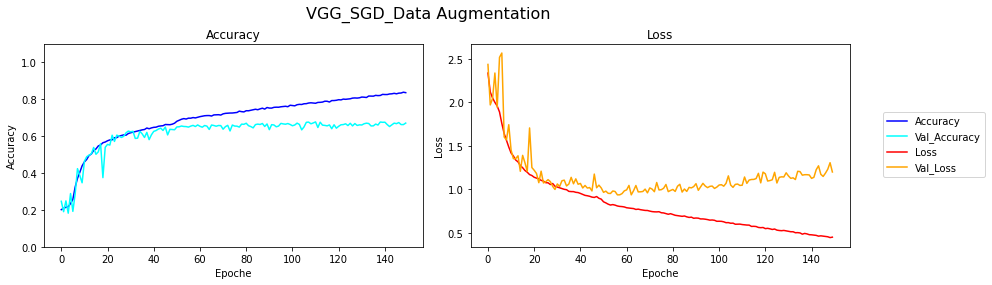

In [ ]:
#Plotten der Accuracy und des Loss
fig , ax = plt.subplots(1,2)
fig.set_size_inches(12,4)

ax[0].plot(df_sgd['accuracy'], color='b')
ax[0].plot(df_sgd['val_accuracy'], color='cyan')
ax[0].set_title('Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoche')
ax[0].set_ylim([0,1.1])

ax[1].plot(df_sgd['loss'], color='r')
ax[1].plot(df_sgd['val_loss'], color='orange')
ax[1].set_title('Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoche')

fig.tight_layout()
fig.subplots_adjust(hspace=0.4, top=0.85)
text = fig.suptitle('VGG_SGD_Data Augmentation', fontsize=16)
lgd = fig.legend(['Accuracy', 'Val_Accuracy', 'Loss', 'Val_Loss'], bbox_to_anchor=(1.15, 0.5), loc="center right")
plt.show()

##Confusion Matrix

In [ ]:
#Modell laden:
Modell_ConfusionMatrix = load_model('Finetune_VGG_5_SGD_32,0.005_DA.h5')

In [ ]:
#Vorhersage der Emotionen durch das Modell
predictions = Modell_ConfusionMatrix.predict(X_test_48x48)
maxprediction = np.argmax(predictions,axis=1)

113/113 [==============================] - 10s 15ms/step


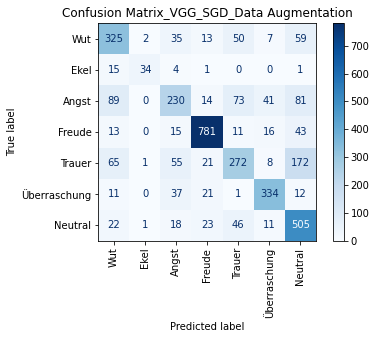

In [ ]:
#Erstellen der Confusion Matrix
c_m = confusion_matrix(y_test, maxprediction)
display_c_m = ConfusionMatrixDisplay(c_m, display_labels=['Wut', 'Ekel', 'Angst', 'Freude', 'Trauer', 'Überraschung', 'Neutral'])
display_c_m.plot(cmap='Blues', xticks_rotation=90)

plt.xticks(label=emotion_label)
plt.yticks(label=emotion_label)
plt.title('Confusion Matrix_VGG_SGD_Data Augmentation', fontsize=12)
plt.show()

In [ ]:
#Classification Report
target_names = ['Wut', 'Ekel', 'Angst', 'Freude', 'Trauer', 'Überraschung', 'Neutral']
print(classification_report(y_test, maxprediction, digits=4, target_names=target_names))

              precision    recall  f1-score   support

         Wut     0.6019    0.6619    0.6305       491
        Ekel     0.8947    0.6182    0.7312        55
       Angst     0.5838    0.4356    0.4989       528
      Freude     0.8936    0.8885    0.8910       879
      Trauer     0.6004    0.4579    0.5196       594
Überraschung     0.8010    0.8029    0.8019       416
     Neutral     0.5785    0.8067    0.6738       626

    accuracy                         0.6913      3589
   macro avg     0.7077    0.6674    0.6781      3589
weighted avg     0.6939    0.6913    0.6856      3589

